In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [2]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('data.csv')
    
# Chọn các cột 'x1', 'x2', 'x3', 'x4', 'x5' làm đầu vào và 'y' làm đầu ra
x_data = df[['x1', 'x2', 'x3', 'x4', 'x5']]
y_data = df['y']

# Khởi tạo danh sách để lưu trữ dữ liệu đầu vào dưới dạng tensors
x_train = []

# Lặp qua từng hàng trong x_data
for index in range(len(x_data)):
    # Lấy hàng thứ index từ DataFrame
    row = x_data.iloc[index]
    # Chuyển đổi từng giá trị trong hàng thành list
    x_values = [ast.literal_eval(val) for val in row.values]
    # Thêm tensor tương ứng vào danh sách x_train
    x_train.append(torch.tensor(x_values, dtype=torch.float32))

# Chuyển đổi dữ liệu đầu ra thành tensor PyTorch
y_train = torch.tensor(y_data.values, dtype=torch.long)

# Tạo tensor từ danh sách các tensors đầu vào
X_train = torch.stack(x_train)

# In ra kích thước của tensors đầu vào và đầu ra
print("x_train:", X_train.shape)
print("y_train:", y_train.shape)

x_train: torch.Size([26846, 5, 10])
y_train: torch.Size([26846])


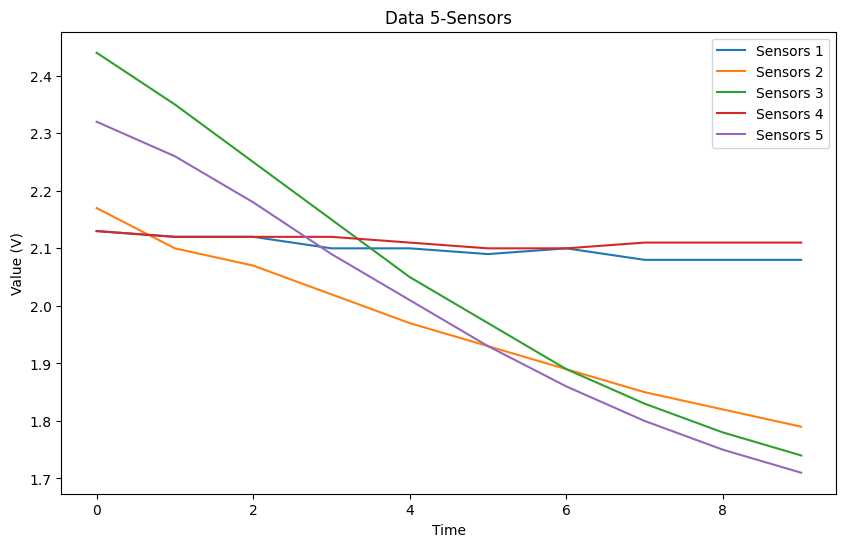

In [3]:
# Chọn một mẫu ngẫu nhiên từ tập dữ liệu huấn luyện
num_samples = y_train.shape[0]
sample_index = np.random.randint(0, num_samples)

# Trích xuất dữ liệu và nhãn của mẫu đã chọn
sample_data = X_train[sample_index].numpy()

# Định nghĩa các hằng số để dễ đọc hơn
NUM_SENSORS = 5
SENSOR_LABEL_FORMAT = "Sensors {}"

plt.figure(figsize=(10, 6))
# Vẽ dữ liệu
for i in range(NUM_SENSORS):
    plt.plot(sample_data[i], label=SENSOR_LABEL_FORMAT.format(i+1))

# Thêm tiêu đề, nhãn và chú thích
plt.title('Data 5-Sensors')
plt.xlabel('Time')
plt.ylabel('Value (V)')
plt.legend()
plt.show();
